##To get the mnist data from Sklearm datasets

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

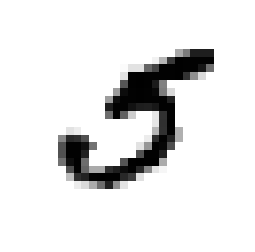

In [87]:
some_digit = X[36000]
three_digit = X[24164]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

In [7]:
y[36000]

5.0

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [12]:
y_train_5 = (y_train == 5)

In [14]:
y_test_5 = (y_test == 5)

In [15]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=5,random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [16]:
sgd_clf.predict([some_digit])

array([ True])

In [17]:
from  sklearn.model_selection  import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96795, 0.9381 , 0.9642 ])

In [18]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [19]:
y_train_pred

array([False, False, False, ..., False, False, False])

In [20]:

from  sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53177,  1402],
       [ 1193,  4228]], dtype=int64)

In [21]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.7509769094138543

In [22]:
recall_score(y_train_5, y_train_pred)

0.7799299022320605

In [23]:

from  sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7651796217536874

In [24]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([200803.39637265])

In [25]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [26]:
y_some_digit_pred

array([ True])

In [27]:
thresholdthreshol  = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred


array([ True])

In [28]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [29]:
y_scores.shape

(60000,)

In [30]:
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

In [31]:
y_scores

array([-471396.21422245, -716240.51693042, -583974.08774421, ...,
       -781524.26653389, -228817.03913475, -317785.69072009])

In [32]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [33]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g", label="Recall")
    plt.xlabel("Threshold")
    plt.ylabel("Count")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

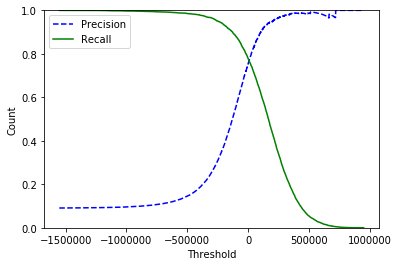

In [34]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [35]:
(y_train_pred == (y_scores > 0)).all()

True

In [36]:
y_train_pred_90 = (y_scores > 70000)

In [37]:
precision_score(y_train_5, y_train_pred_90)

0.8625381186957541

In [38]:
recall_score(y_train_5, y_train_pred_90)

0.6782881387197934

In [39]:
def plot_precision_vs_recall(pre, rec):
    plt.plot(rec, pre, "b", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

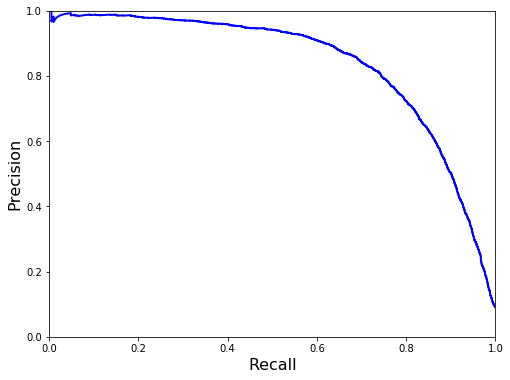

In [40]:
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [41]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

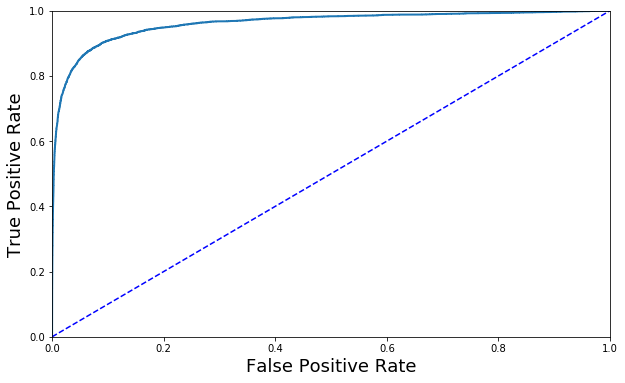

In [42]:
def plot_roc_curve(fpr, tpr,label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'b--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)

plt.figure(figsize=(10, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [43]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9607905505082339

In [44]:
from  sklearn.ensemble  import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

C:\Users\bdhooda\AppData\Local\conda\conda\envs\dfhdfh\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [45]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

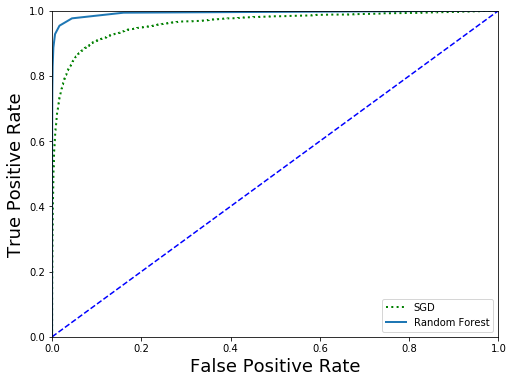

In [46]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "g:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=10)
plt.show()

In [47]:

roc_auc_score(y_train_5, y_scores_forest)

0.9931404550156644

In [48]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9846692947875603

In [49]:
recall_score(y_train_5, y_train_pred_forest)

0.8293672754104409

In [50]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([5.])

In [51]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-230152.35654804, -394676.26150227, -351721.49310877,
        -299598.96490194, -364494.37159807,  200803.39637265,
        -828948.02670239, -307148.62023356, -674563.54788394,
        -928973.06219044]])

In [52]:
np.argmax(some_digit_scores)

5

In [53]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [54]:
sgd_clf.classes_[5]

5.0

In [55]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([three_digit])

array([3.])

In [56]:
len(ovo_clf.estimators_)

45

In [57]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([three_digit])

array([3.])

In [58]:
forest_clf.predict_proba([three_digit])

array([[0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0.2, 0. ]])

In [59]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.84618076, 0.85584279, 0.86042906])

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.9080184 , 0.90879544, 0.9106866 ])

In [70]:

y_train_pred= cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5733,    3,   24,   10,    9,   45,   50,    8,   38,    3],
       [   2, 6462,   43,   28,    7,   47,    4,   13,  124,   12],
       [  53,   36, 5327,   95,   78,   27,  105,   57,  167,   13],
       [  46,   40,  140, 5349,    2,  229,   38,   60,  137,   90],
       [  21,   28,   39,   10, 5345,   11,   50,   35,   84,  219],
       [  69,   36,   37,  191,   68, 4596,  111,   31,  189,   93],
       [  28,   23,   44,    2,   45,   87, 5636,    6,   47,    0],
       [  25,   22,   67,   29,   55,   10,    5, 5817,   16,  219],
       [  48,  151,   71,  166,   12,  156,   57,   28, 5018,  144],
       [  39,   30,   28,   85,  159,   37,    2,  224,   78, 5267]],
      dtype=int64)

In [71]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

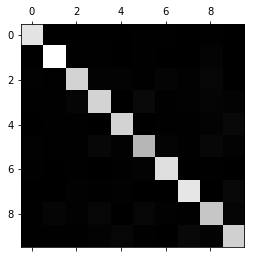

In [72]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [73]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

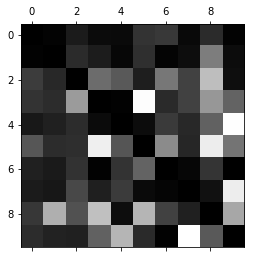

In [74]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [77]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

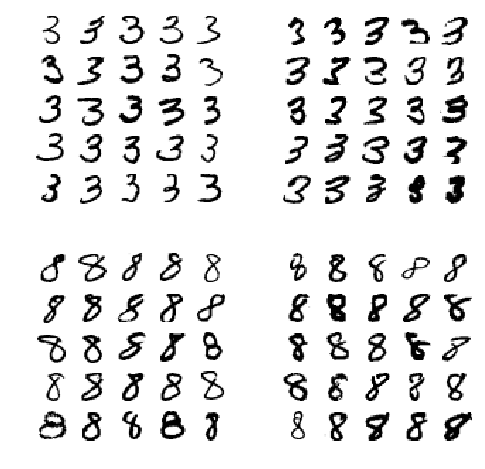

In [80]:
cl_a, cl_b = 3 , 8
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [81]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [84]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [85]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9767439299550544

In [92]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [97]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

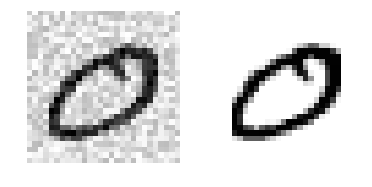

In [103]:
some_indexsome_ind  = 24164
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

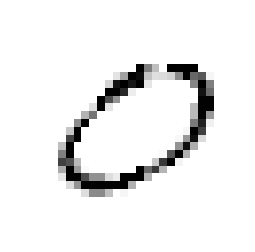

In [105]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

In [3]:
import keras
keras.__version__

ModuleNotFoundError: No module named 'keras'

In [4]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

ModuleNotFoundError: No module named 'keras'